In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

In [2]:
df = pd.read_csv('Impaired_Driving_Death_Rate__by_Age_and_Gender__2012___2014__All_States.csv')

In [3]:
df.head()

,State,Location,"All Ages, 2012","All Ages, 2014","Ages 0-20, 2012","Ages 0-20, 2014","Ages 21-34, 2012","Ages 21-34, 2014","Ages 35+, 2012","Ages 35+, 2014","Male, 2012","Male, 2014","Female, 2012","Female, 2014"
0,United States,"United States\r\n(39.759995942000046, -98.4999...",3.3,3.1,1.3,1.2,6.7,6.2,3.1,3.0,5.2,4.9,1.5,1.4
1,Alabama,"Alabama\r\n(32.84057234800002, -86.63185738799...",5.5,5.5,2.7,2.1,10.3,10.0,5.0,5.5,8.4,8.6,2.9,2.6
2,Alaska,"Alaska\r\n(64.84507799500005, -147.72205958799...",NaN,2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arizona,"Arizona\r\n(34.86597351900008, -111.7638066469...",3.6,3.0,1.6,NaN,6.9,5.5,3.3,3.1,5.4,4.5,1.7,1.5
4,Arkansas,"Arkansas\r\n(34.74865032200006, -92.2744896679...",5.1,4.6,NaN,NaN,10.5,6.3,4.3,5.4,8.1,7.2,2.2,2.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 14 columns):
State               52 non-null object
Location            52 non-null object
All Ages, 2012      50 non-null float64
All Ages, 2014      49 non-null float64
Ages 0-20, 2012     24 non-null float64
Ages 0-20, 2014     18 non-null float64
Ages 21-34, 2012    42 non-null float64
Ages 21-34, 2014    41 non-null float64
Ages 35+, 2012      46 non-null float64
Ages 35+, 2014      46 non-null float64
Male, 2012          48 non-null float64
Male, 2014          48 non-null float64
Female, 2012        35 non-null float64
Female, 2014        35 non-null float64
dtypes: float64(12), object(2)
memory usage: 5.8+ KB


In [5]:
df.columns

Index(['State ', 'Location', 'All Ages, 2012', 'All Ages, 2014',
       'Ages 0-20, 2012', 'Ages 0-20, 2014', 'Ages 21-34, 2012',
       'Ages 21-34, 2014', 'Ages 35+, 2012', 'Ages 35+, 2014', 'Male, 2012',
       'Male, 2014', 'Female, 2012', 'Female, 2014'],
      dtype='object')

In [6]:
df2 = df.drop(columns=['Location', 'All Ages, 2012', 'All Ages, 2014']).copy()
df2.rename(columns={"State ": "State"}, inplace=True)
df2.fillna(0,inplace=True)
df2.head()

,State,"Ages 0-20, 2012","Ages 0-20, 2014","Ages 21-34, 2012","Ages 21-34, 2014","Ages 35+, 2012","Ages 35+, 2014","Male, 2012","Male, 2014","Female, 2012","Female, 2014"
0,United States,1.3,1.2,6.7,6.2,3.1,3.0,5.2,4.9,1.5,1.4
1,Alabama,2.7,2.1,10.3,10.0,5.0,5.5,8.4,8.6,2.9,2.6
2,Alaska,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Arizona,1.6,0.0,6.9,5.5,3.3,3.1,5.4,4.5,1.7,1.5
4,Arkansas,0.0,0.0,10.5,6.3,4.3,5.4,8.1,7.2,2.2,2.2


In [7]:
df2.columns

Index(['State', 'Ages 0-20, 2012', 'Ages 0-20, 2014', 'Ages 21-34, 2012',
       'Ages 21-34, 2014', 'Ages 35+, 2012', 'Ages 35+, 2014', 'Male, 2012',
       'Male, 2014', 'Female, 2012', 'Female, 2014'],
      dtype='object')

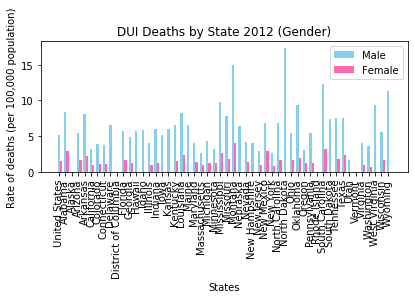

In [8]:
x = np.arange(52)
plt.bar(x, df2["Male, 2012"], 0.35, label="Male", align="center", color="skyblue")
plt.bar(x+0.35, df2["Female, 2012"], 0.35, label="Female", align="center", color="hotpink")

plt.xticks(x, df2["State"], rotation=90)
plt.legend()
plt.xlabel("States")
plt.ylabel("Rate of deaths (per 100,000 population)")
plt.title("DUI Deaths by State 2012 (Gender)")
plt.tight_layout()

plt.savefig("DUI Deaths by State 2012 (Gender).png")
plt.show()

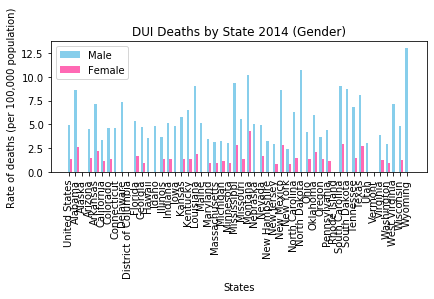

In [9]:
x = np.arange(52)
plt.bar(x, df2["Male, 2014"], 0.35, label="Male", align="center", color="skyblue")
plt.bar(x+0.35, df2["Female, 2014"], 0.35, label="Female", align="center", color="hotpink")

plt.xticks(x, df2["State"], rotation=90)
plt.legend()
plt.xlabel("States")
plt.ylabel("Rate of deaths (per 100,000 population)")
plt.title("DUI Deaths by State 2014 (Gender)")
plt.tight_layout()

plt.savefig("DUI Deaths by State 2014 (Gender).png")
plt.show()

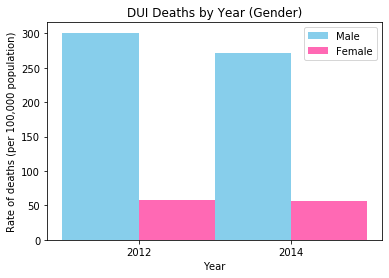

In [10]:
male2012 = df2['Male, 2012'].sum()
female2012 = df2["Female, 2012"].sum()
male2014 = df2['Male, 2014'].sum()
female2014 = df2["Female, 2014"].sum()

plt.bar(1, male2012, 0.5, label="Male", align="center", color="skyblue")
plt.bar(1.5, female2012, 0.5, label="Female", align="center", color="hotpink")
plt.bar(2, male2014, 0.5, align="center", color="skyblue")
plt.bar(2.5, female2014, 0.5, align="center", color="hotpink")
plt.legend()

plt.xlabel("Year")
plt.xticks([1.25,2.25],["2012", "2014"])
plt.ylabel("Rate of deaths (per 100,000 population)")
plt.title("DUI Deaths by Year (Gender)")

plt.savefig("DUI Deaths by Year (Gender).png")
plt.show()

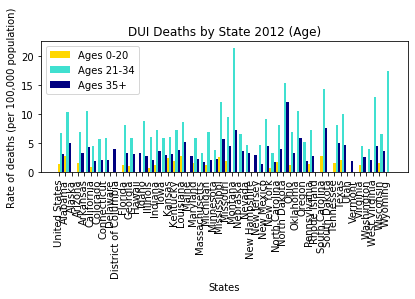

In [11]:
x = np.arange(52)
plt.bar(x, df2['Ages 0-20, 2012'], 0.35, label="Ages 0-20", align="center", color="gold")
plt.bar(x+0.35, df2['Ages 21-34, 2012'], 0.35, label="Ages 21-34", align="center", color="turquoise")
plt.bar(x+0.7, df2['Ages 35+, 2012'], 0.35, label="Ages 35+", align="center", color="navy")

plt.xticks(x, df2["State"], rotation=90)
plt.legend()
plt.xlabel("States")
plt.ylabel("Rate of deaths (per 100,000 population)")
plt.title("DUI Deaths by State 2012 (Age)")
plt.tight_layout()

plt.savefig("DUI Deaths by State 2012 (Age).png")
plt.show()

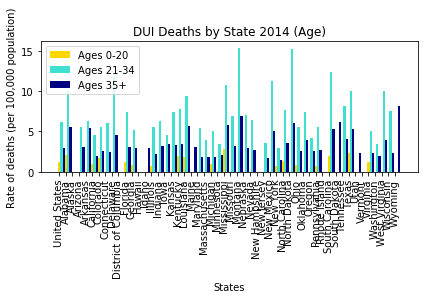

In [12]:
x = np.arange(52)
plt.bar(x, df2['Ages 0-20, 2014'], 0.35, label="Ages 0-20", align="center", color="gold")
plt.bar(x+0.35, df2['Ages 21-34, 2014'], 0.35, label="Ages 21-34", align="center", color="turquoise")
plt.bar(x+0.7, df2['Ages 35+, 2014'], 0.35, label="Ages 35+", align="center", color="navy")

plt.xticks(x, df2["State"], rotation=90)
plt.legend()
plt.xlabel("States")
plt.ylabel("Rate of deaths (per 100,000 population)")
plt.title("DUI Deaths by State 2014 (Age)")
plt.tight_layout()

plt.savefig("DUI Deaths by State 2014 (Age).png")
plt.show()

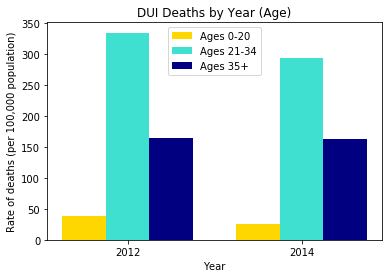

In [13]:
age12012 = df2['Ages 0-20, 2012'].sum()
age22012 = df2['Ages 21-34, 2012'].sum()
age32012 = df2['Ages 35+, 2012'].sum()
age12014 = df2['Ages 0-20, 2014'].sum()
age22014 = df2['Ages 21-34, 2014'].sum()
age32014 = df2['Ages 35+, 2014'].sum()


plt.bar(1, age12012, 0.25, label="Ages 0-20", align="center", color="gold")
plt.bar(1.25, age22012, 0.25, label="Ages 21-34", align="center", color="turquoise")
plt.bar(1.5, age32012, 0.25, label="Ages 35+", align="center", color="navy")
plt.bar(2, age12014, 0.25, align="center", color="gold")
plt.bar(2.25, age22014, 0.25, align="center", color="turquoise")
plt.bar(2.5, age32014, 0.25, align="center", color="navy")
plt.legend()

plt.xlabel("Year")
plt.xticks([1.25,2.25],["2012", "2014"])
plt.ylabel("Rate of deaths (per 100,000 population)")
plt.title("DUI Deaths by Year (Age)")

plt.savefig("DUI Deaths by Year (Age).png")
plt.show()